In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [4]:
class RandomUnderSampler:
    def __init__(self):
        pass

    def fit_resample(self, X, y):
        classes, class_counts = np.unique(y, return_counts=True)

        min_class_size = np.min(class_counts)

        X_resampled = []
        y_resampled = []

        for class_label in classes:
            class_samples = X[y == class_label]
            n_class_samples = class_samples.shape[0]

            if n_class_samples > min_class_size:
                selected_indices = np.random.choice(class_samples.shape[0], min_class_size, replace=False)
                selected_samples_resampled = class_samples[selected_indices]
            else:
                selected_samples_resampled = class_samples
            
            X_resampled.append(selected_samples_resampled)
            y_resampled.append(np.full(min_class_size, class_label))
            
        X_resampled = np.vstack(X_resampled)
        y_resampled = np.hstack(y_resampled)
        return X_resampled, y_resampled

In [5]:
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [6]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({0: 41, 1: 41, 2: 41})


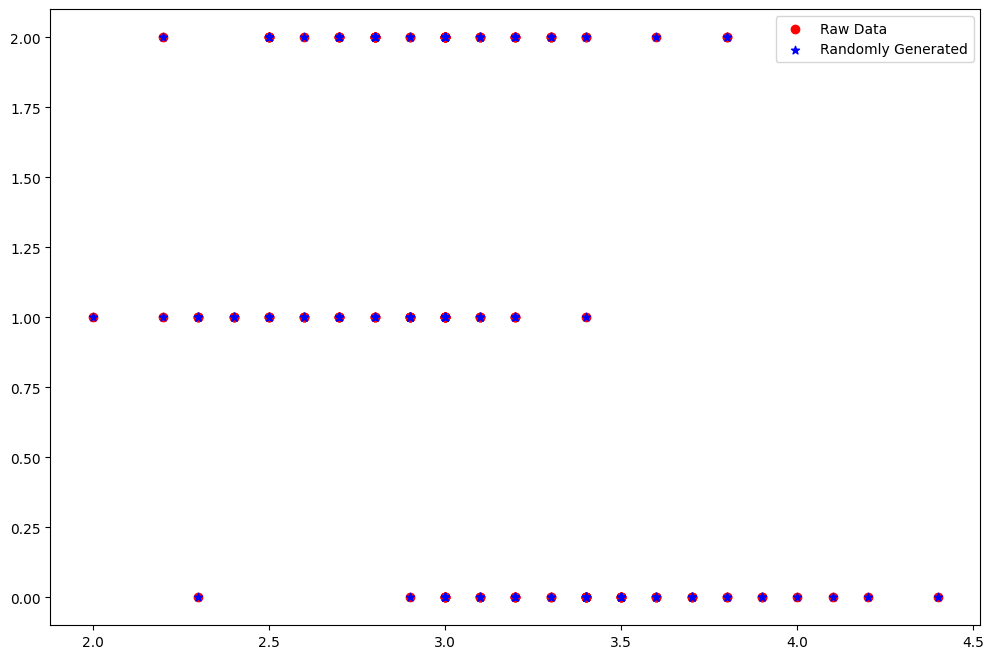

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 1], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 1], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "Randomly Generated"])
plt.show()